<a href="https://colab.research.google.com/github/Huynhngocthanh/DoAn_2022/blob/main/17_3_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bài 1: Hãy trình bày cách đọc 1 tập dữ liệu vào bộ nhớ (ví dụ: Iris). Yêu cầu giải thích bằng lời và
triển khai bằng code sau đó.

In [76]:
#Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [77]:
#sử dụng thư viện pandas và hàm read_csv để dọc dữ liệu
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


Bài 2: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy tiến hành mô tả bằng các thông số thống kê mô tả
và hình vẽ tương ứng.

In [78]:
#thống kê mô tả
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [79]:
#các cột trong dữ liệu
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [80]:
#kích thước dữ liệu
df.shape

(150, 5)

In [81]:
#mô tả tập dữ liệu các giá trị
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [82]:
#bảng giá trị
df.groupby(df["sepal_length"])["species"].value_counts()

sepal_length  species   
4.3           setosa        1
4.4           setosa        3
4.5           setosa        1
4.6           setosa        4
4.7           setosa        2
4.8           setosa        5
4.9           setosa        4
              versicolor    1
              virginica     1
5.0           setosa        8
              versicolor    2
5.1           setosa        8
              versicolor    1
5.2           setosa        3
              versicolor    1
5.3           setosa        1
5.4           setosa        5
              versicolor    1
5.5           versicolor    5
              setosa        2
5.6           versicolor    5
              virginica     1
5.7           versicolor    5
              setosa        2
              virginica     1
5.8           versicolor    3
              virginica     3
              setosa        1
5.9           versicolor    2
              virginica     1
6.0           versicolor    4
              virginica     2
6.1           v

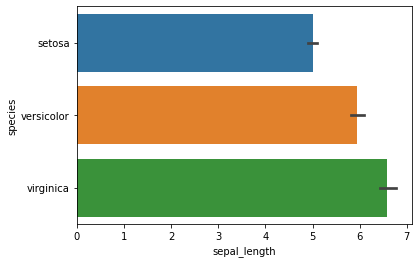

In [83]:
#Biểu đồ thể hiện chiều cao mỗi loại
sns.barplot(x="sepal_length",y="species",data=df)
plt.show()

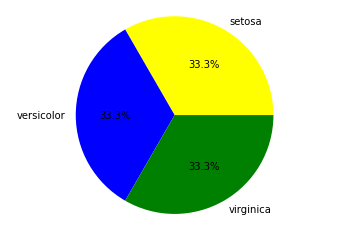

In [84]:
#Biểu đồ thể hiện tỉ lệ phần tử 
labels='setosa','versicolor','virginica'
colors=['Yellow','blue','green']
g=df.species.value_counts()
plt.pie(g,labels=labels,colors=colors,autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.xticks(rotation=0)
plt.show()

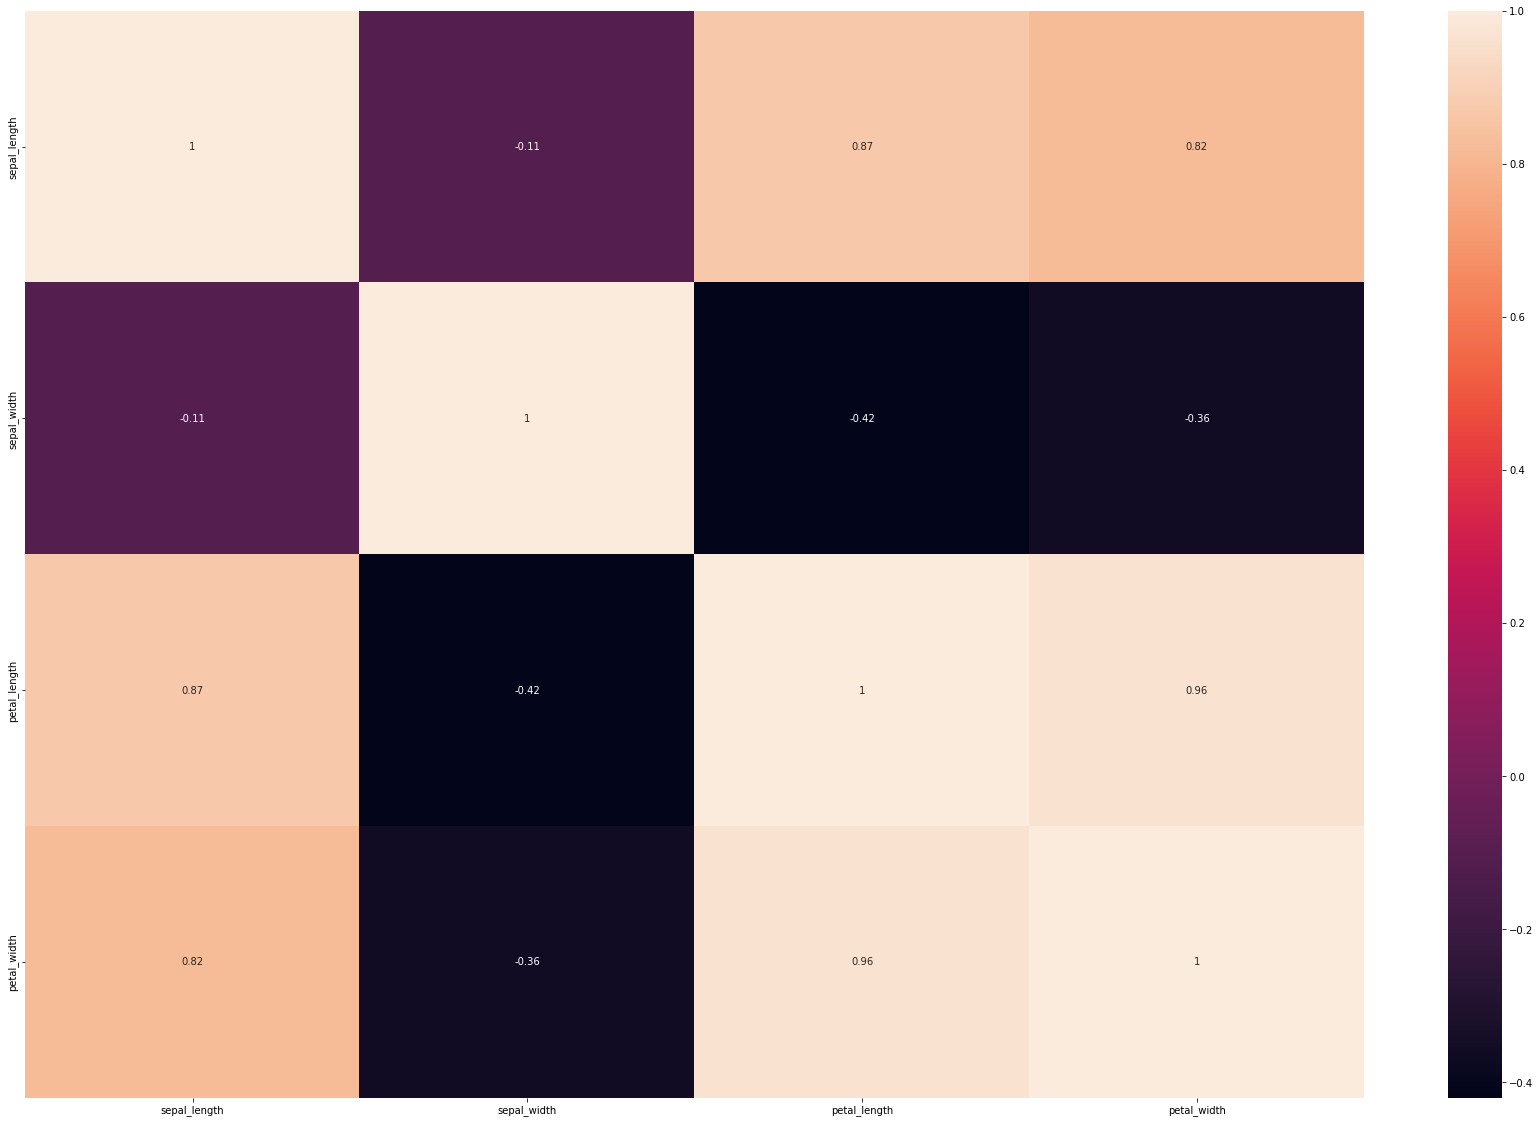

In [85]:
#Biểu đồ thể hiện mối quan hệ của các giá trị
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

Bài 3: Từ tập dữ liệu trong bộ nhớ nêu trên, hãy:
- Trình bày cách xác định dữ liệu và xác định nhãn lớp. Code tương ứng
- Trình bày cách chia tập dữ liệu ban đầu thành tập dữ liệu huấn luyện và tập dữ liệu kiểm
thử. Code tương ứng.

In [86]:
#Xác định tập dữ liệu và nhãn lớp
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
k = {'setosa':0,'versicolor':1,'virginica':2}
Y = df['species'].map(k)
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [87]:
#Chia tập dữ liệu
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.30)

print("Kích thước tập dữ liệu train",x_train.shape)
print("Kích thước tập dữ liệu test",x_test.shape)

Kích thước tập dữ liệu train (105, 4)
Kích thước tập dữ liệu test (45, 4)


Bài 4: Hãy trình bày lý thuyết về phương pháp 10-fold cross validation và code minh họa

Cross validation là một kỹ thuật lấy mẫu để đánh giá mô hình học máy trong trường hợp dữ liệu không được nhiều.

K-fold có nghĩa là:

Tập dữ liệu (data) được chia thành k tập con không giao nhau (gọi là “fold”) có kích thước xấp xỉ nhau. Mỗi lần lặp, một tập con trong k tập sẽ được dùng để làm tập kiểm thử, (k-1) tập còn lại sẽ được sử dụng làm tập huấn luyện. k giá trị lỗi (mỗi giá trị tương ứng với mỗi “fold”) sẽ được tính trung bình cộng để thu được giá trị lỗi tổng thể. Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá

Tham số quan trọng trong kỹ thuật này là k, đại diện cho số nhóm mà dữ liệu sẽ được chia ra. Vì lý do đó, nó được mang tên k-fold cross-validation. Khi giá trị của k được lựa chọn, người ta sử dụng trực tiếp giá trị đó trong tên của phương pháp đánh giá. Ví dụ với k=10, phương pháp sẽ mang tên 10-fold cross-validation.

Kỹ thuật này thường bao gồm các bước như sau:

Xáo trộn dataset một cách ngẫu nhiên

Chia dataset thành k nhóm

Với mỗi nhóm:

Sử dụng nhóm hiện tại để đánh giá hiệu quả mô hình

Các nhóm còn lại được sử dụng để huấn luyện mô hình

Huấn luyện mô hình

Đánh giá và sau đó hủy mô hình

Tổng hợp hiệu quả của mô hình dựa từ các số liệu đánh giá

In [88]:
from sklearn.model_selection import KFold

#Tạo dữ liệu 
T = ["s",'h','i','n','o','h','m','a','l','u','e','x']

#Kfold CV
cv = KFold(n_splits=10, random_state= 1 , shuffle=True)

for train, test in cv.split(T):
  print("Train data",train,"Test data",test)

Train data [ 0  1  4  5  6  7  8  9 10 11] Test data [2 3]
Train data [ 0  1  2  3  5  6  7  8  9 11] Test data [ 4 10]
Train data [ 0  2  3  4  5  6  7  8  9 10 11] Test data [1]
Train data [ 0  1  2  3  4  5  7  8  9 10 11] Test data [6]
Train data [ 1  2  3  4  5  6  7  8  9 10 11] Test data [0]
Train data [ 0  1  2  3  4  5  6  8  9 10 11] Test data [7]
Train data [ 0  1  2  3  4  5  6  7  8  9 10] Test data [11]
Train data [ 0  1  2  3  4  5  6  7  8 10 11] Test data [9]
Train data [ 0  1  2  3  4  5  6  7  9 10 11] Test data [8]
Train data [ 0  1  2  3  4  6  7  8  9 10 11] Test data [5]


Bài 5: Hãy trình bày lý thuyết về các chủ điểm sau:

Bias là gì?
Overfitting là gì?
RMSE là gì?
Precision là gì?
Bias là sự sai lệch giữa giá trị mà model chúng ta dự đoán được với giá trị thật ( predict - ground truth). Mô hình với low bias thì chênh lệch giữa giá trị dự đoán và giá trị thật nhỏ => Mô hình tốt. Và ngược lại high bias thì chênh lệch giữa predict và ground truth lớn => Mô hình lỗi cao trên cả tập huấn luyện ( training) và tập kiểm thử ( testing) => Underfitting

Overfitting là mô hình quá khít với dữ liệu, nó sẽ đúng trên tập training nhưng trên tập test (kiểm thử ) thì kết quả rất tệ. Các mô hình này thường có bias nhỏ và độ phân tán dữ liệu lớn.

RMSE (Lỗi trung bình bình phương) là độ lệch chuẩn của phần dư ( lỗi dự đoán ). Phần dư là thước đo khoảng cách từ các điểm dữ liệu đường hồi quy; RMSE là thước đo mức độ lan truyền của những phần dư này. Nói cách khác, nó cho bạn biết mức độ tập trung của dữ liệu xung quanh dòng phù hợp nhất . Lỗi bình phương trung bình thường được sử dụng trong khí hậu học, dự báo và phân tích hồi quy để xác minh kết quả thí nghiệm.

Precision thể hiện sự chuẩn xác của model, giúp chúng ta hình dung độ tin cậy của mô hình học máy. Số này càng cao thì model phân loại càng chuẩn

Độ tin cậy = Số lần phân loại đúng/(Số lần phân loại đúng + Số lần phân loại sai)

Bài 6: Hãy trình bày phương pháp đánh giá mô hình bằng cách sử dụng tập dữ liệu kiểm thử (test dataset) và code tương ứng

In [72]:
#Tạo tập dữ liệu y_test là biến dự đoán, y là biến phản hồi 
df = pd.DataFrame({'y_pred': [6, 8, 12, 14, 14, 15, 17, 22, 24, 23],
                   'y_test': [6, 8, 9, 14, 14, 15, 21, 23, 24,22]})

Bài 7: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy tuyến tính và xây dựng mô
hình hồi quy tuyến tính theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

Bước 1: Tải dữ liệu

In [89]:
#lấy dữ liệu iris
from sklearn.datasets import load_iris
iris = load_iris()

Bước 2: Mô tả dữ liệu

In [90]:
#kích thước dữ liệu
iris.data.shape

(150, 4)

In [91]:
#các giá trị cột
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [93]:
#mô tả dữ liệ
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

Bước 3: Phân chia train test với tỉ lệ 7/3

In [95]:
X, y = datasets.load_iris(return_X_y=True)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, y, test_size=0.3, random_state=0)

Bước 4: Huấn luyện mô hình với train set

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
lr = linear_model.LinearRegression()
lr.fit(X1_train, Y1_train)

LinearRegression()

Bước 5: Kiểm thử mô hình với test set

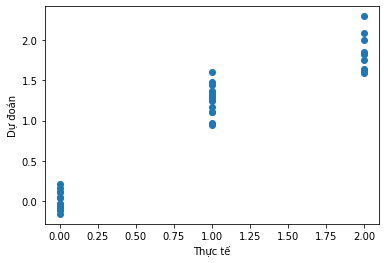

In [97]:
Y_pred = lr.predict(X1_test)
plt.scatter(Y1_test, Y_pred)
plt.xlabel("Thực tế")
plt.ylabel("Dự đoán")
plt.show()

Bước 6: Trình bày kết quả

In [98]:
print("Accuracy:",lr.score(X1_test, Y1_test))

Accuracy: 0.8998261101639005


Bài 8: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy phi tuyến và xây dựng mô
hình hồi quy phi tuyến theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét

Bài 9: Bạn hãy lựa chọn 1tập dữ liệu phù hợp với bài toán hồi quy logistic và xây dựng mô hình
hồi quy logistic theo từng bước (kèm với mô tả của từng bước)
- Bước 1: Tải dữ liệu
- Bước 2: Mô tả dữ liệu
- Bước 3: Phân chia train – test (tỉ lệ 70% -30%)
- Bước 4: Huấn luyện mô hình với train set (10-fold cross validation)
- Bước 5: Kiểm thử mô hình với test set
- Bước 6: Trình bày kết quả và nhận xét